<a href="https://colab.research.google.com/github/Jay-prakashpandey/Spark-foundation-project/blob/main/Exploratory_Data_Analysis_Retail(Level_Beginner).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task- 3
# **GRIP @ The Sparks Foundation**

**Exploratory Data Analysis - Retail(Level - Beginner)**

BY: Jay Prakash Pandey

*Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’*


*● As a business manager, try to find out the weak areas where you can
work to make more profit.*

*● What all business problems you can derive by exploring the data?*

*● Dataset: https://bit.ly/3i4rbWl*

In [2]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Loading the dataset

In [3]:
dataset = pd.read_csv("SampleSuperstore.csv")
print("Data imported successfully")

Data imported successfully


#Analysis of Dataset

In [4]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#the datatype of the columns
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
print(dataset.shape)
print(dataset.info())

(9994, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [7]:
#basic statisical details 
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#Drop Unwanted Features

In [8]:
dataset['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
#drop country and postal code since all the data are from United States
dataset.drop(['Country','Postal Code'],inplace=True, axis=1)

#Null Values

In [10]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# checking for duplicate values
dataset.duplicated().sum()

50

In [12]:
# dropping the duplicates
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#Correlation

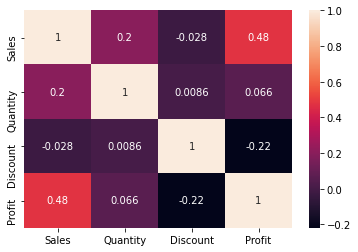

In [13]:
fig1=dataset.corr()
sns.heatmap(fig1,annot=True)

From the correlation coefficients it is evident that relation between variables is not strong enough.
* Discount and Profit,Discount and Sales are negatively Correlated.
* Sales and profit are netrually correlated

#EXPLORATORY DATA ANALYSIS
*Data Visualization*

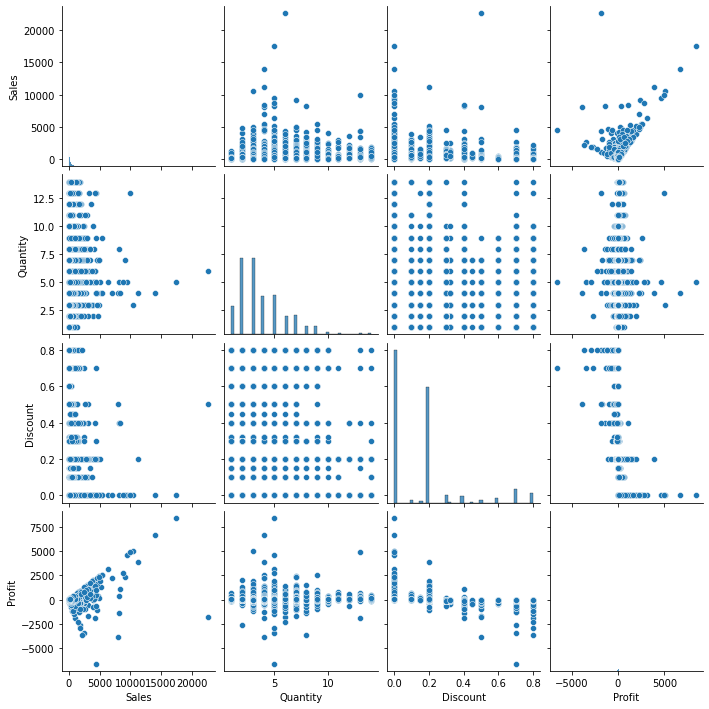

In [14]:
# visualizing the dataset as a whole using the pair plot
import seaborn as sns 
sns.pairplot(dataset)

#Visualizing Ship Modes

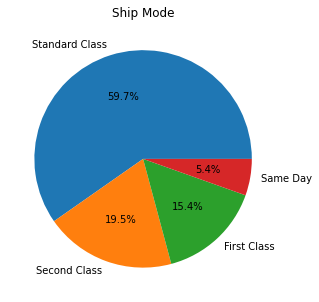

In [15]:
plt.figure(figsize = (5,5))
plt.title('Ship Mode')
plt.pie(dataset['Ship Mode'].value_counts(), labels=dataset['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

#We can analyse the data further in 3 different ways

1. Sales ,Profit ,Discount Analysis at each Level

2. Product Category Level Analysis
3. Geographic Level Analysis

#1. Sales Vs Profit Vs Discount

a) Based on Region

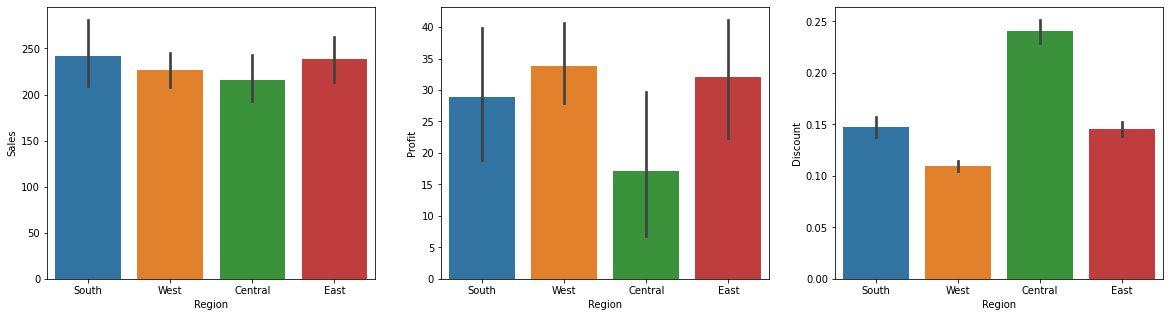

In [17]:
fig, ax =plt.subplots(1,3,figsize=(20,5))
sns.barplot(x='Region', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Region', y='Profit', data = dataset,ax=ax[1])
sns.barplot(x='Region', y='Discount', data = dataset,ax=ax[2])
plt.show()

Though the Sales is Souther region is high
The Profits are highest in Western region Because of low Discounts
Central region has highest discount, probably the reason for lowest profits.

#b) Based on Category

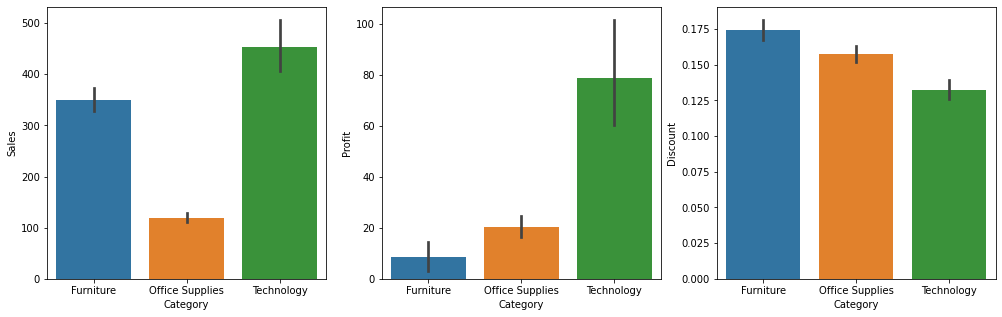

In [18]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Category', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = dataset,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = dataset,ax=ax[2])
plt.show()


Inspite of having less discounts Technology is having highest Profits and sales.

Though the sales of Furniture are high the profits are not so comparable.


#c) Based on Segement

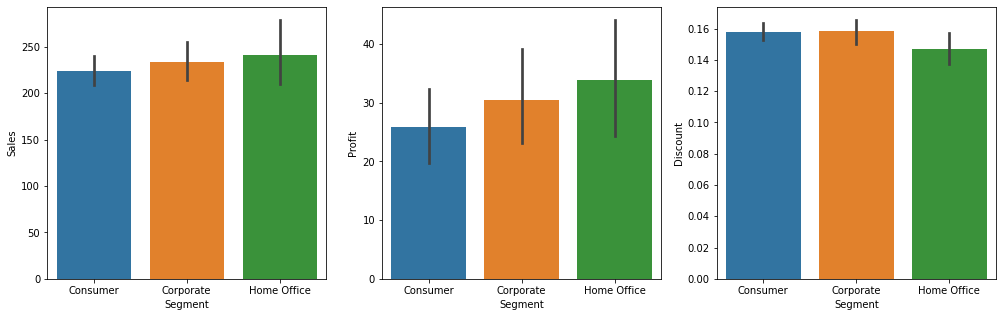

In [19]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Segment', y='Profit', data = dataset,ax=ax[1])
sns.barplot(x='Segment', y='Discount', data = dataset,ax=ax[2])

We can observe that both sales and profit of "Home Office" segment is highest but have less discounts.

Having high discounts in consumer segment , it has low profits

#d) Based on Ship mode

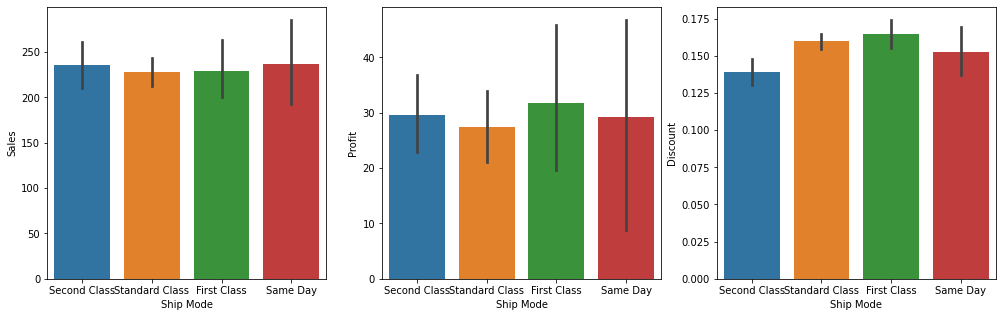

In [21]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Ship Mode', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = dataset,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = dataset,ax=ax[2])

Most sales are in where shipping is carried on Same day.

Due to high discounts in first class , it has Maximum profits.

#e) Based on Quantity -Sales & Profit & Discount

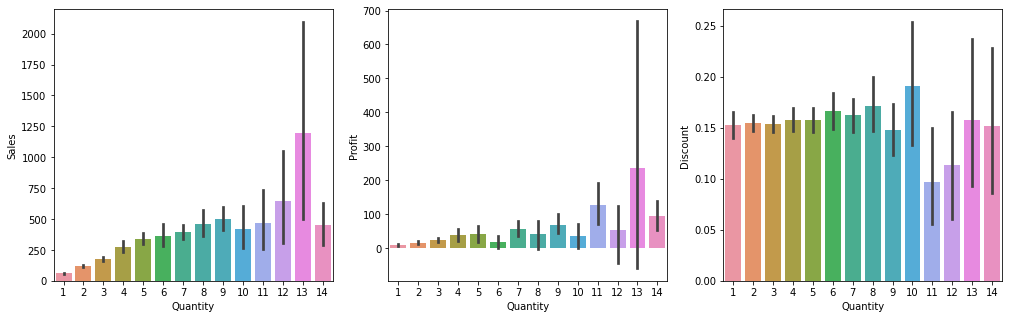

In [23]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Quantity', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Quantity', y='Profit', data = dataset,ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data = dataset,ax=ax[2])

13 Number of Quantity is high for sales and Profit.

But maximun discounts are given in #10

#f) Based on Discount -Sales & Profit

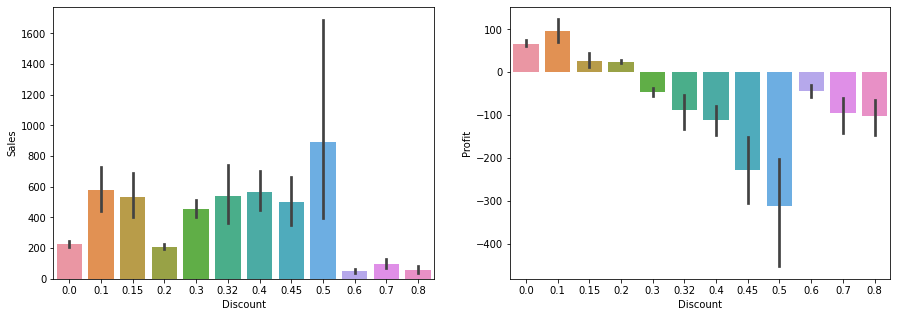

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Discount', y='Sales', data = dataset,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = dataset)

As the Discount is increasing the profits are going into negative. 

But the same trend can be observed with sales after 60% dicount rates.

At 50% discount the sales are maximum

#2)Category Level Analysis

Visualizing the Categories

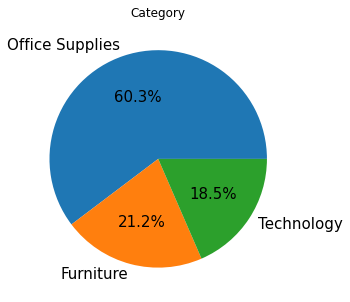

In [25]:
plt.figure(figsize = (5,5))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

The count of office supplies sold is highest when compared to remaining categories.

#Number of Quantity in each Sub-Category

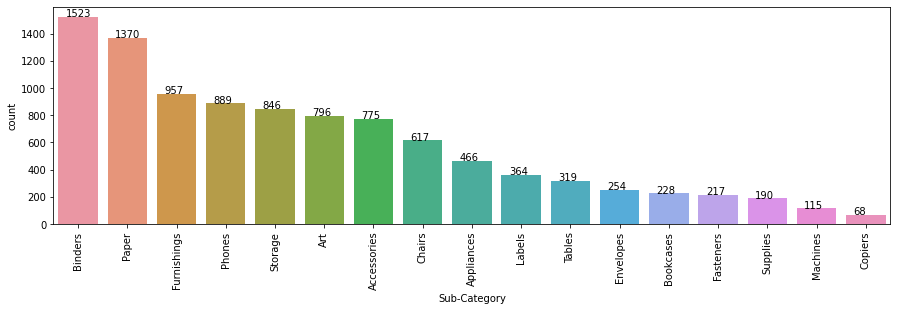

In [26]:
plt.figure(figsize=(15,4))
ax=sns.countplot("Sub-Category", data = dataset,order = dataset['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

The sales of Binders and papers are highest compared to all other sub-categories.

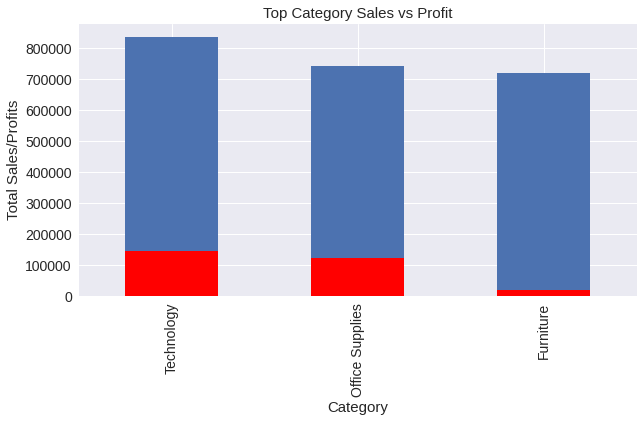

In [27]:
# computing top categories in terms of sales from first 100 observations
top_category_s = dataset.groupby("Category").Sales.sum().nlargest(n=100)
# computing top categories in terms of profit from first 100 observations
top_category_p = dataset.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

The graph clearly depicts that Technology and Office Supplies have the most sales and profit
#Visualizing the Sales vs Profits in different Sub-Categories

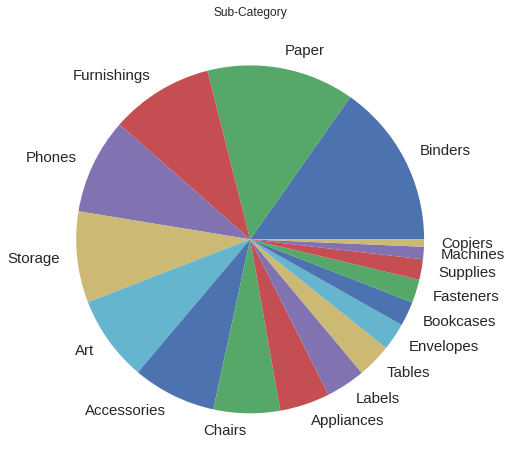

In [28]:
plt.figure(figsize = (8,8))
textprops = {"fontsize":15}
plt.title('Sub-Category')
plt.pie(dataset['Sub-Category'].value_counts(), labels=dataset['Sub-Category'].value_counts().index,textprops = textprops)
plt.show()

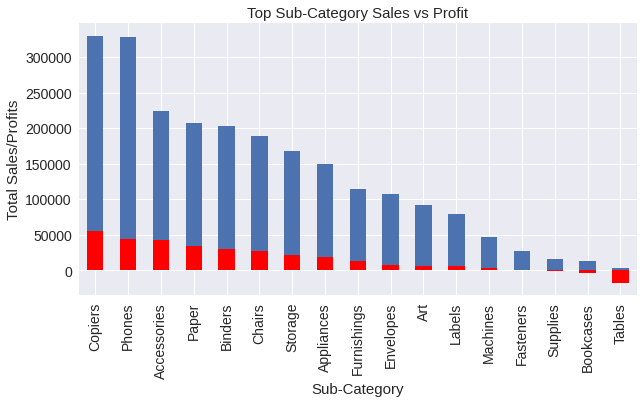

In [29]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = dataset.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

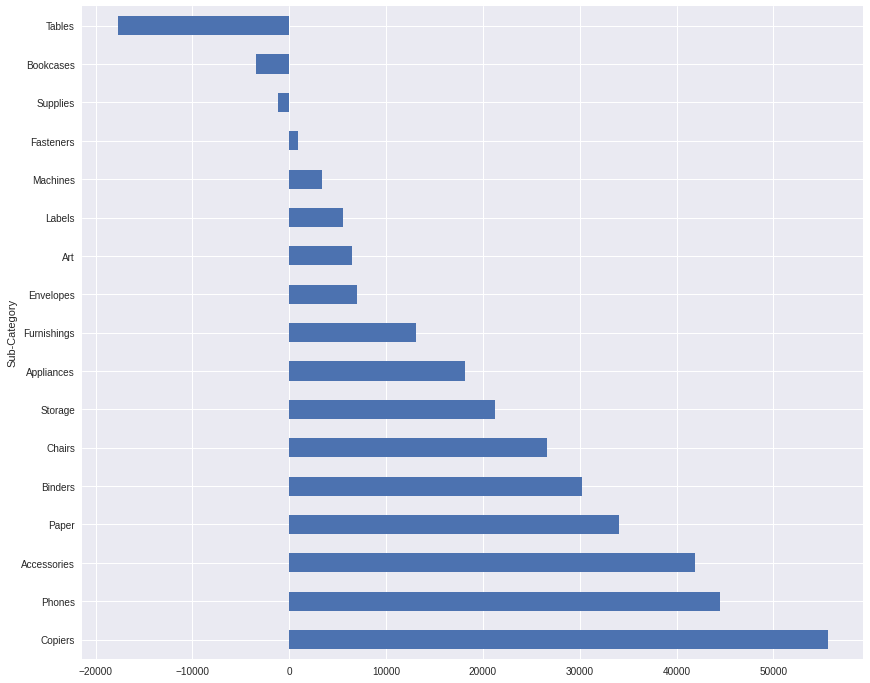

In [30]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal

We can see that Sub-Category - Phones(Technology) generated the highest revenue of about $330007

The Total Revenue generated by all the categories - $2297200!

#f) Based on Category wise -Discount Vs Profit

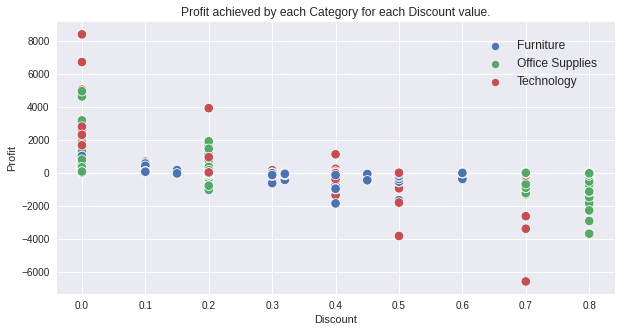

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x="Discount", y="Profit", data=dataset, hue="Category",ax=ax,s=90)
ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
ax.set_title('Profit achieved by each Category for each Discount value.')
plt.show()

The Office Supplies has maximum loss at 80% and 0% discount.

Furniture and Technology had maximum loss at lower Discount rates

#3) Geographic Level Analysis
a) State wise Sales

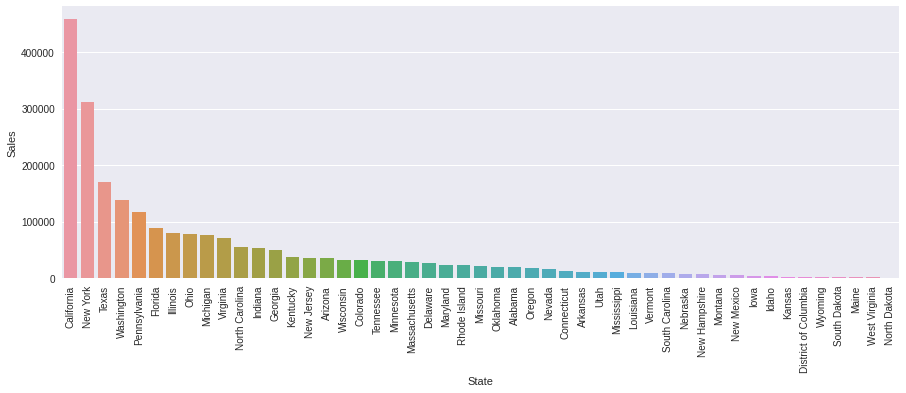

In [33]:
data_state= dataset.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

California and Newyork has highest sales followed by Texas

Maine , West Virgina and North Dakota has lowest sales

#b)State wise Profits

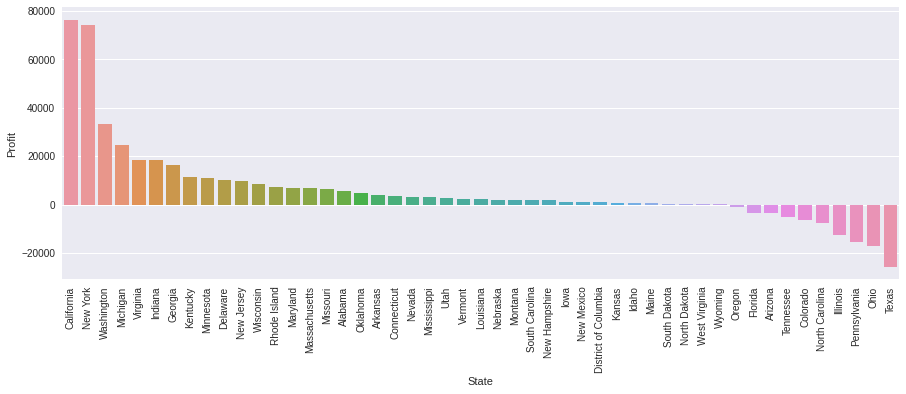

In [35]:
data_state= dataset.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

California has highest profits as well as sales followed by New York.

In some states the profits are in negative.

#States with Negative profits

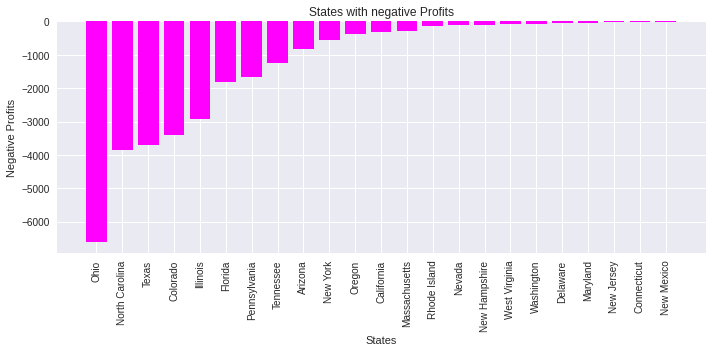

In [38]:
state_low_Profit=dataset.loc[dataset.Profit < 0]
state_low_Profit=state_low_Profit.sort_values("Profit")
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(state_low_Profit['State'],state_low_Profit['Profit'],color='magenta') 
ax.set_title(label="States with negative Profits")
ax.set_ylabel('Negative Profits')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.tight_layout()

Ohio has more than $6000 loss in profits .

In total there are 23 states which are in losses.

#C)State wise Discount

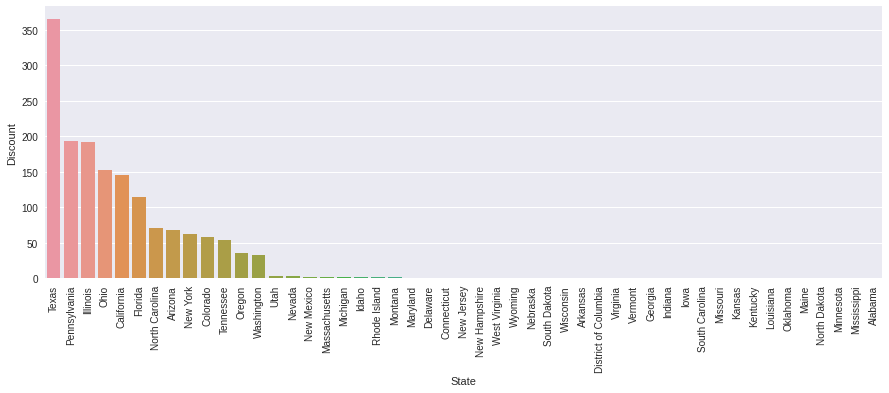

In [39]:
data_state= dataset.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Discount', data = data_state)
plt.show()

Maximum discount is provided in Texas where profits are in negative.
Similar is happening with Ohio, illinous.

#d) Analaysing States with Profit and Sales

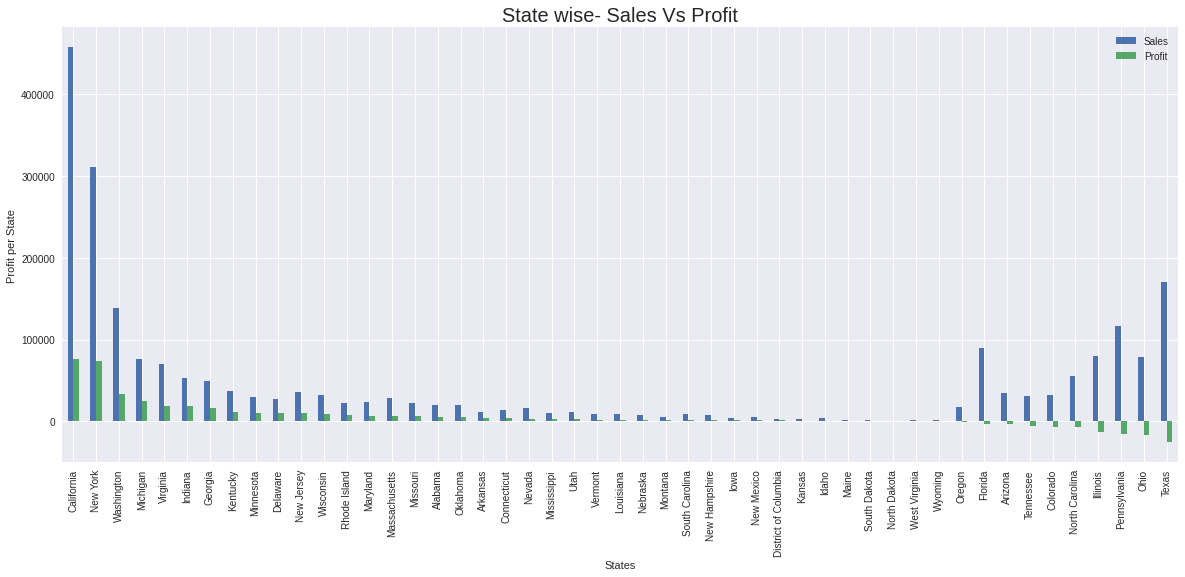

In [41]:
data_state= dataset.groupby(['State'])[['Sales', 'Profit']].sum()
data_state.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.title('State wise- Sales Vs Profit', fontsize = 20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

The relation between sales and profits is not always linear. 

In some states , we can see the sales are in peak but the profits are not.

#e) Profit , Sales, Discount on GeoMap

#Checking the interdependency of Sales,Profits and Discounts

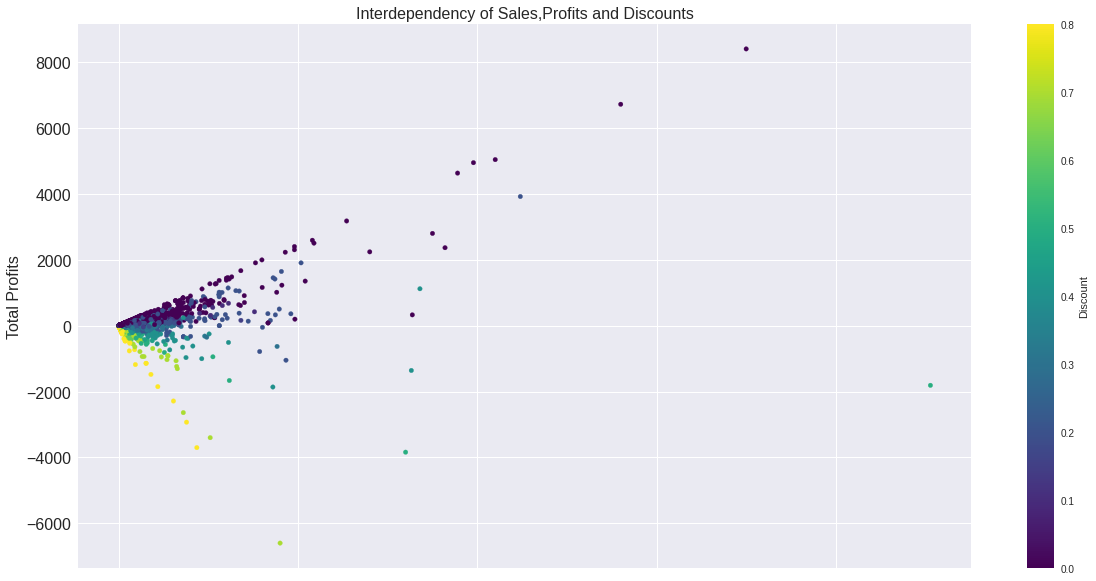

In [46]:
plt.style.use('seaborn')
dataset.plot(kind = "scatter",figsize = (20,10), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

#*OBSERVATIONS*
**Weak areas where Manager can work to make more profit.**

1. Profits and Sales are not Linear in most of the states.

2. Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.

3. Central region needs to be given more attention.

4. Machines and supplies are having less profit and are a loss making sub-category.

5. Furnitures are not providing much profit margin.

6. Higher discounts are not of much use, the profit are in negative and even the sales are having downtrend after 60% discount.
7. The Office Supplies has maximum loss at 80% and 0% discount.

8.Furniture and Technology had maximum loss at lower Discount rates

#What all business problems you can derive by exploring the data

**1) How to maximise the PROFITS along with Sales improvement?**

* TECHNOLOGY gives more profit compared to furniture category.

* Profits can be maximised if the Ship mode is 'Same day'.
* Western region has more profit margins, by analysing the marketing stratergies the profit of other regions and be increased.
* Vermont state is having high profit margin even though the sales are not high, marketing strategies analysis needs to be performed.
* Discount less than or equal to 50% is having highest sales and profit marging.
* Provide optimal Discount to Technology and Furniture to attract much customers
* The Top 5 Sub-Categories account to ~50% of the Sales, suggesting need for accelerated marketing Strategies or introducing additional Products in those categories.
* In Segments, Home-office has High Profit & sales, suggest to promote more for higher profits

**2) Improve Inventory**

* As furniture has low profit margin and have more storage cost, they can be sold on long waiting period,as people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.
* The stock of Office Supplies and Technology can be improved for the same price of Furniture storage.